# Schlögl

- A + 2X -> 3X, rate k1
- 3X -> A+2X, rate k2
- B -> X, rate k3
- X -> B, rate k4

In [1]:
import pints
import pints.toy.stochastic
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm

In [2]:
%load_ext line_profiler

In [18]:
x_0 = 500

model = pints.toy.stochastic.SchloglModel(x_0)

times = np.linspace(0, 5, 100)
k = [3e-7, 1e-4, 1e-3, 3.5]

valuess = [model.simulate(k, times, approx_tau=0.0125) for i in tqdm(range(1000))]



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<01:20, 12.39it/s]

  0%|          | 3/1000 [00:00<01:35, 10.43it/s]

  0%|          | 4/1000 [00:00<01:37, 10.17it/s]

  0%|          | 5/1000 [00:00<01:40,  9.93it/s]

  1%|          | 6/1000 [00:00<01:41,  9.82it/s]

  1%|          | 7/1000 [00:00<01:42,  9.66it/s]

  1%|          | 10/1000 [00:00<01:22, 12.07it/s]

  1%|▏         | 13/1000 [00:00<01:07, 14.54it/s]

  2%|▏         | 15/1000 [00:01<01:08, 14.37it/s]

  2%|▏         | 17/1000 [00:01<01:04, 15.24it/s]

  2%|▏         | 20/1000 [00:01<00:57, 16.90it/s]

  2%|▏         | 22/1000 [00:01<01:20, 12.18it/s]

  2%|▏         | 24/1000 [00:01<01:40,  9.76it/s]

  3%|▎         | 26/1000 [00:02<01:31, 10.65it/s]

  3%|▎         | 28/1000 [00:02<01:19, 12.25it/s]

  3%|▎         | 31/1000 [00:02<01:06, 14.63it/s]

  3%|▎         | 34/1000 [00:02<00:57, 16.85it/s]

  4%|▎         | 37/1000 [00:02<00:57, 16.75it/s]

  4%|▍         | 39/1000 [00:02<01:01, 15.56

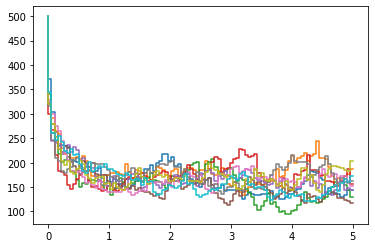

In [19]:
for value in valuess[:10]:
    plt.step(times, value)

In [8]:
%timeit model.simulate(k, times)

376 ms ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit model.simulate(k, times, approx_tau=0.0125)

31.7 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
valuess = np.array(valuess)

No handles with labels found to put in legend.


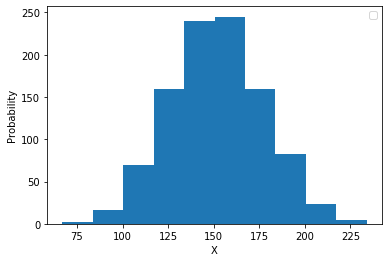

In [13]:
plt.hist(valuess[:,-1])
plt.legend()
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, averaging the concentration values at each time step, produces a reproducible result which tends towards a deterministic function as the the number of iterations tends to infinity (Erban et al., 2007): $ n_0e^{-kt} $


In [ ]:
N = 100
average = np.zeros(len(times))
for i in range(N):
    values = np.asarray(model.simulate(k, times))[0,:]
    average += (values/N)
    

In [ ]:
average.shape

In [ ]:

plt.plot(times, average, label = 'deterministic mean of A(t)')
plt.title('stochastic degradation across different iterations')
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.legend(loc = 'upper right')
plt.show()

The deterministic mean (from above) is plotted with the deterministic standard deviation. 
The deterministic variance of this model is given by: $e^{-2kt}(-1 + e^{kt})n_0$

In [ ]:
mean = model.mean(k, times)
variance = model.variance(k, times)
std_dev = np.sqrt(variance)

plt.plot(times, mean, '-', label = 'deterministic mean of A(t)')
plt.plot(times, mean + std_dev, '--', label = 'standard deviation upper bound')
plt.plot(times, mean - std_dev, '--', label = 'standard deviation lower bound')
plt.legend(loc = 'upper right')
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()